In [ ]:
# Versión preliminar - Clasificador de emociones

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Montar Drive y definir directorio
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/IA3-PROYECTO/datos.csv')

In [ ]:
# Preprocesamiento
df['text'] = df['text'].astype(str).str.lower()

# Tokenización
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

max_len = 100
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Codificación de etiquetas
df['label'] = df['label'].astype(int)
labels = sorted(df['label'].unique().tolist())
label2idx = {str(l): i for i, l in enumerate(labels)}
idx2label = {i: str(l) for i, l in enumerate(labels)}

y = np.array([label2idx[str(l)] for l in df['label']])
num_classes = len(labels)
y_cat = tf.keras.utils.to_categorical(y, num_classes=num_classes)

In [ ]:
# División de datos
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [ ]:
# Modelo preliminar
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
save_dir = "/content/drive/MyDrive/IA3-PROYECTO/"
checkpoint_path = os.path.join(save_dir, "best_model_preliminar.h5")
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=64,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/5
5210/5211 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3325 - loss: 1.5791
Epoch 1: val_accuracy improved from -inf to 0.33785, saving model to /content/drive/MyDrive/IA3-PROYECTO/best_model_preliminar.h5


5211/5211 ━━━━━━━━━━━━━━━━━━━━ 383s 73ms/step - accuracy: 0.3325 - loss: 1.5791 - val_accuracy: 0.3379 - val_loss: 1.5760
Epoch 2/5
5210/5211 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3397 - loss: 1.5732
Epoch 2: val_accuracy did not improve from 0.33785
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 460s 77ms/step - accuracy: 0.3397 - loss: 1.5732 - val_accuracy: 0.3379 - val_loss: 1.5745
Epoch 3/5
5210/5211 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3385 - loss: 1.5737
Epoch 3: val_accuracy did not improve from 0.33785
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 418s 72ms/step - accuracy: 0.3385 - loss: 1.5737 - val_accuracy: 0.3379 - val_loss: 1.5749
Epoch 4/5
5210/5211 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3386 - loss: 1.5736
Epoch 4: val_accuracy did not improve from 0.33785
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 377s 72ms/step - accuracy: 0.3386 - loss: 1.5736 - val_accuracy: 0.3379 - val_loss: 1.5747
Epoch 5/5
5210/5211 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3384 - loss: 1.5726
Epoch 5

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.3395 - loss: 1.5760

Precisión en validación: 0.3379
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Texto: I love you
Emoción predicha: 1 (confianza: 0.3243)


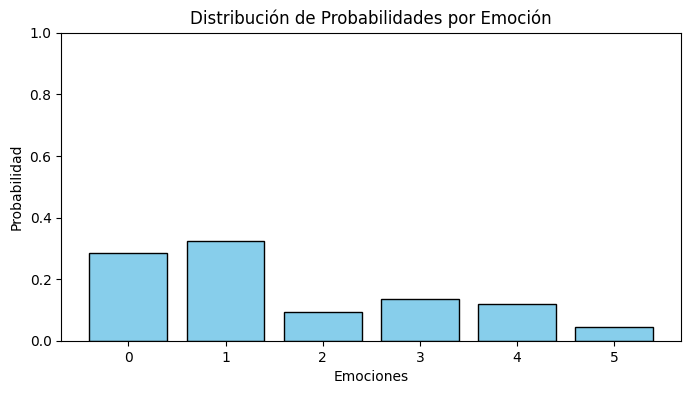

('1', 0.3243362307548523)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Cargar el mejor modelo y evaluar
model.load_weights(checkpoint_path)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
print(f"\nPrecisión en validación: {val_acc:.4f}")

# Función para predecir emociones y graficar probabilidades
def predecir_emocion(texto):
    seq = tokenizer.texts_to_sequences([texto.lower()])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)
    idx = np.argmax(pred)

    # Mostrar predicción principal
    print(f"\nTexto: {texto}")
    print(f"Emoción predicha: {idx2label[idx]} (confianza: {pred[0][idx]:.4f})")

    # Gráfica de barras con las probabilidades de cada clase
    emociones = [idx2label[i] for i in range(len(pred[0]))]
    plt.figure(figsize=(8,4))
    plt.bar(emociones, pred[0], color='skyblue', edgecolor='black')
    plt.title("Distribución de Probabilidades por Emoción")
    plt.xlabel("Emociones")
    plt.ylabel("Probabilidad")
    plt.ylim(0, 1)
    plt.show()

    return idx2label[idx], float(pred[0][idx])

# Ejemplo
predecir_emocion("I love you")

#'0' 'sadness'
#'1' 'joy'
#'2' 'love'
#'3' 'anger'
#'4' 'fear'
#'5' 'surprise'

In [ ]:
print(np.unique(y, return_counts=True))

(array([0, 1, 2, 3, 4, 5]), array([121187, 141067,  34554,  57317,  47712,  14972]))


/tmp/ipython-input-33677687.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


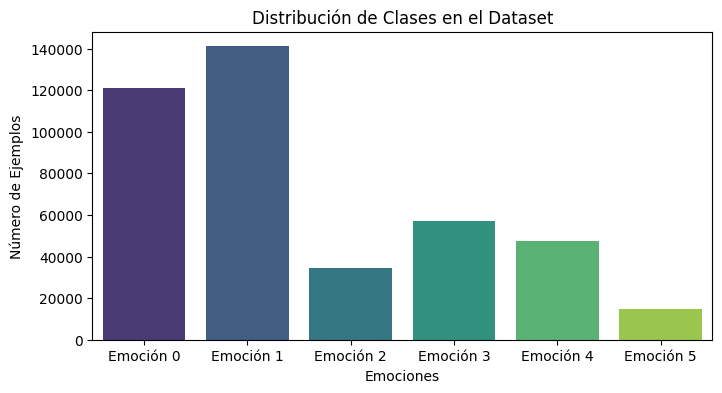

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Emoción 0', 'Emoción 1', 'Emoción 2', 'Emoción 3', 'Emoción 4', 'Emoción 5']
counts = [121187, 141067, 34554, 57317, 47712, 14972]

plt.figure(figsize=(8,4))
sns.barplot(x=labels, y=counts, palette="viridis")
plt.title("Distribución de Clases en el Dataset")
plt.xlabel("Emociones")
plt.ylabel("Número de Ejemplos")
plt.show()


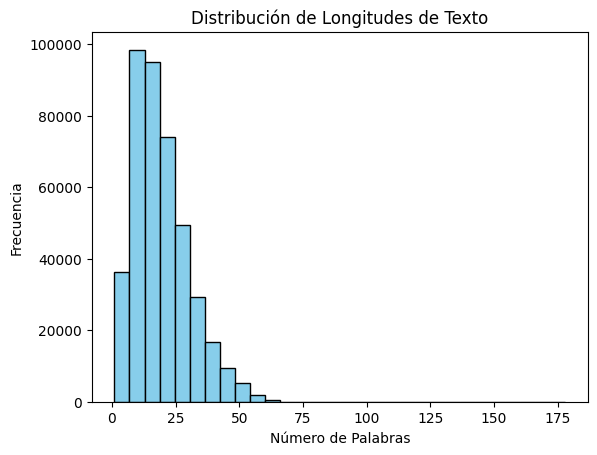

In [ ]:
# Si tus textos están en un DataFrame
lengths = [len(str(x).split()) for x in df['text']]

# O si los tienes en una lista llamada X_train_texts
# lengths = [len(x.split()) for x in X_train_texts]

plt.hist(lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de Longitudes de Texto")
plt.xlabel("Número de Palabras")
plt.ylabel("Frecuencia")
plt.show()


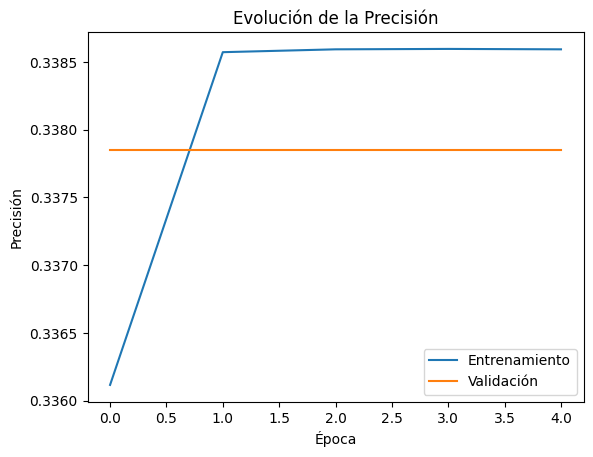

In [ ]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title("Evolución de la Precisión")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.show()

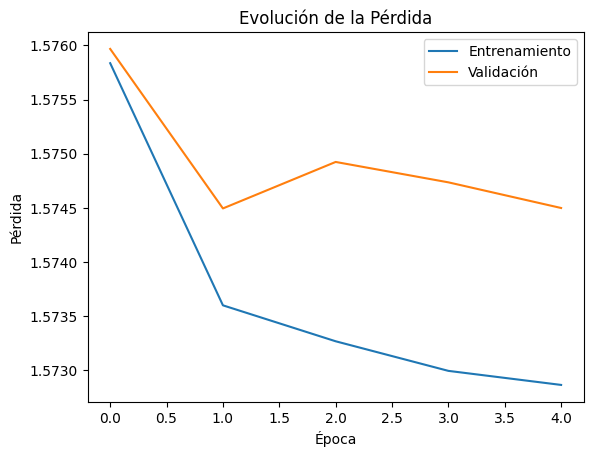

In [ ]:
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title("Evolución de la Pérdida")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.legend()
plt.show()


2606/2606 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step


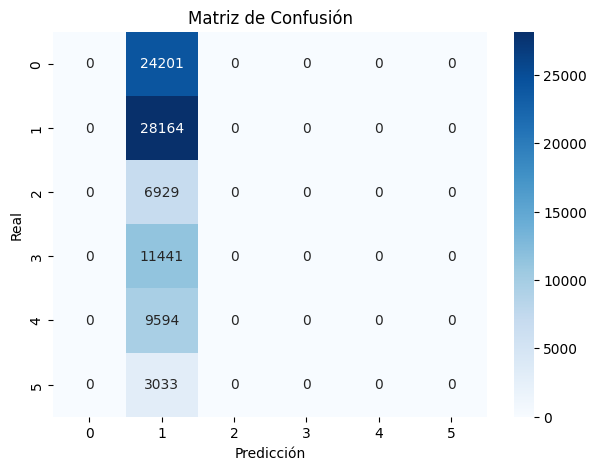

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Si y_val está en one-hot encoding:
if len(y_val.shape) > 1 and y_val.shape[1] > 1:
    y_val_labels = np.argmax(y_val, axis=1)
else:
    y_val_labels = y_val  # ya está en etiquetas

# Predicciones del modelo
y_pred = np.argmax(model.predict(X_val), axis=1)

# Matriz de confusión
cm = confusion_matrix(y_val_labels, y_pred)

# Graficar
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


2606/2606 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


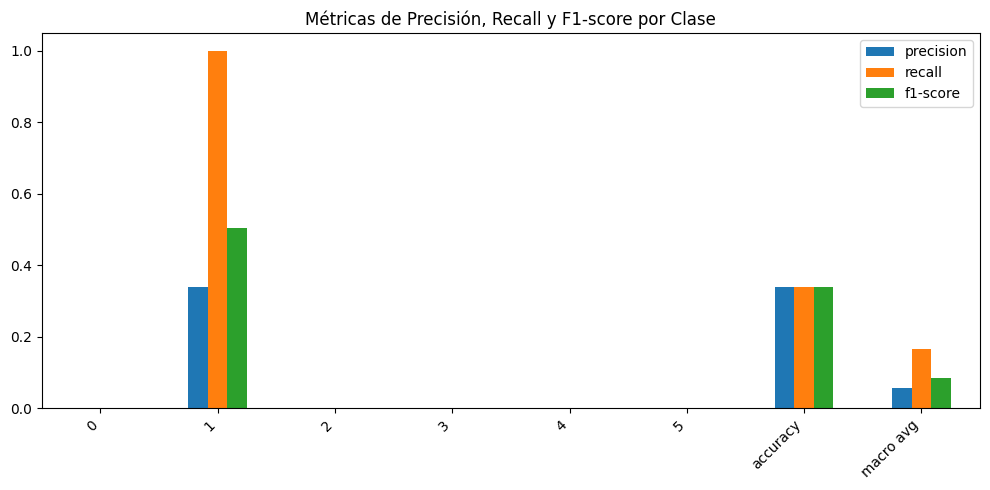

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convertir y_val si está en one-hot
if len(y_val.shape) > 1 and y_val.shape[1] > 1:
    y_val_labels = np.argmax(y_val, axis=1)
else:
    y_val_labels = y_val

# Predicciones del modelo
y_pred = np.argmax(model.predict(X_val), axis=1)

# Generar reporte
report = classification_report(y_val_labels, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:-1, :-1]  # excluye 'accuracy', 'macro avg', 'weighted avg'

# Graficar métricas por clase
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,5))
plt.title("Métricas de Precisión, Recall y F1-score por Clase")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
